In [56]:
#Importing the packages needed to run analyses.
#Pandas, Numpy, Matplotlib and SQLAlchemy are regularly used packages.  If you not have one of these installed, please, open a bash terminal and type: pip.install.<package> where <package> is the package that is not installed.
# Arrow and Seaborn are lesser-used packages, so I have the program install within the environment to finalize the analysis.
try:
    import arrow
except ModuleNotFoundError:
    print("You do not have Arrow installed on your computer.  Let me do that for you.")
    !pip install arrow
    import arrow

try:
    import seaborn as sns
except ModuleNotFoundError:
    print("You do not have Seaborn installed on your computer.  Let me do that for you.")
    !pip install seaborn
    import seaborn as sns

import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates


from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
print("All necessary libraries installed")

#rom matplotlib import style#rom matplotlib import style
#style.use('fivethirtyeight')style.use('fivethirtyeight')


All necessary libraries installed


In [2]:
engine = create_engine("sqlite:///Instructions/Resources/hawaii.sqlite")
print("You engine is ready to go")

You engine is ready to go


In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
keys = Base.classes.keys()
print(f"Here are the keys to the kingdom")
print(*keys, sep=", ")

Here are the keys to the kingdom
measurement, station


In [4]:
session = Session(engine)

In [5]:
Measurement= Base.classes.measurement
Station = Base.classes.station

In [6]:
measure_first_row = session.query(Measurement).first()
measure_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x206e3a933c8>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [7]:
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x206e3a93c50>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [8]:

maxdate = session.query(func.max(Measurement.date)).scalar()
a_maxdate = arrow.get(maxdate)
startdate = a_maxdate.shift(months=-12).format('YYYY-MM-DD')

query = session.query(Measurement).filter(Measurement.date.between(startdate,maxdate)).all()

In [26]:
dates = []
precip = []
for row in query:
    measurement = row
    dates.append(measurement.date)
    precip.append(measurement.prcp)

In [27]:
measurement = pd.DataFrame({"date":dates,
                             "precipitation":precip})
measurement.dropna(inplace = True)
measurement

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [28]:
measurement.set_index('date', inplace = True)
measurement.sort_index(inplace=True)
measurement

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


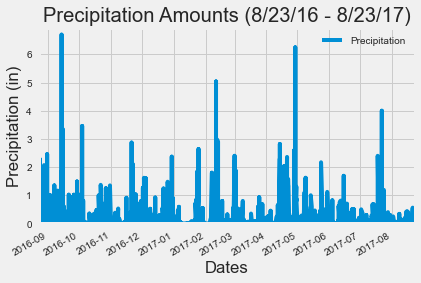

In [61]:
plt.style.use('fivethirtyeight')

date = measurement.index
MDate = mdates.datestr2num(date)
precipitation = measurement['precipitation']


#days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%M')

fig, ax = plt.subplots()


ax.plot(MDate,precipitation,label = 'Precipitation')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.xaxis.set_minor_locator(days)
ax.set_xticks

datemin = np.datetime64(date[0])# - np.timedelta64(10,'D')
datemax = np.datetime64(date[-1])# + np.timedelta64(10,'D')
precipmin = precipitation.min()
precipmax = precipitation.max() + .25
ax.set_xlim(datemin,datemax)
ax.set_ylim(precipmin,precipmax)

ax.grid(True)

fig.autofmt_xdate()

ax.legend()

ax.set_title('Precipitation Amounts (8/23/16 - 8/23/17)')
ax.set_ylabel('Precipitation (in)')
ax.set_xlabel('Dates')


plt.tight_layout

plt.show

plt.savefig('results/precipitation.png')